In [1]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, UpSampling2D, Flatten
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKeras

In [10]:
seed = 0

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [11]:
IMG_HEIGHT = 28
IMG_WIDTH = 28


path = './sign_language/'

In [12]:
# Loading data into numpy arrays

train = np.genfromtxt(path+'sign_mnist_train.csv',delimiter=',', skip_header=True)

test = np.genfromtxt(path+'sign_mnist_test.csv',delimiter=',', skip_header=True)

In [13]:
train.shape, test.shape

((27455, 785), (7172, 785))

In [14]:
y_train = train[:,0]
X_train = train[:,1:].reshape(train.shape[0], 28, 28, 1)/255

y_test = test[:,0]
X_test = test[:,1:].reshape(test.shape[0], 28, 28, 1)/255

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27455, 28, 28, 1), (27455,), (7172, 28, 28, 1), (7172,))

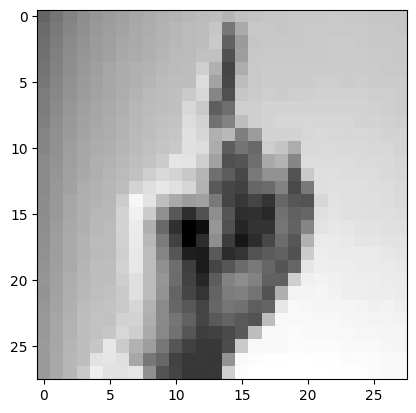

In [76]:
plt.imshow(X_train[0], cmap='gray')

In [17]:
input_shape = (28, 28, 1)

In [18]:
dropout_rate = 0.2


model = Sequential()


model.add(Conv2D(filters=32, kernel_size=3, padding='same', input_shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=3, padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(Dropout(rate=dropout_rate))
model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=25, activation='softmax'))


callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=3,
        verbose=1,
        mode='auto'
    ),
    PlotLossesKeras()
]

optimizer = Adam()

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Users/koa/Documents/ML Course/miniprojects/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,689 (2.65 MB)

 Trainable params: 693,689 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

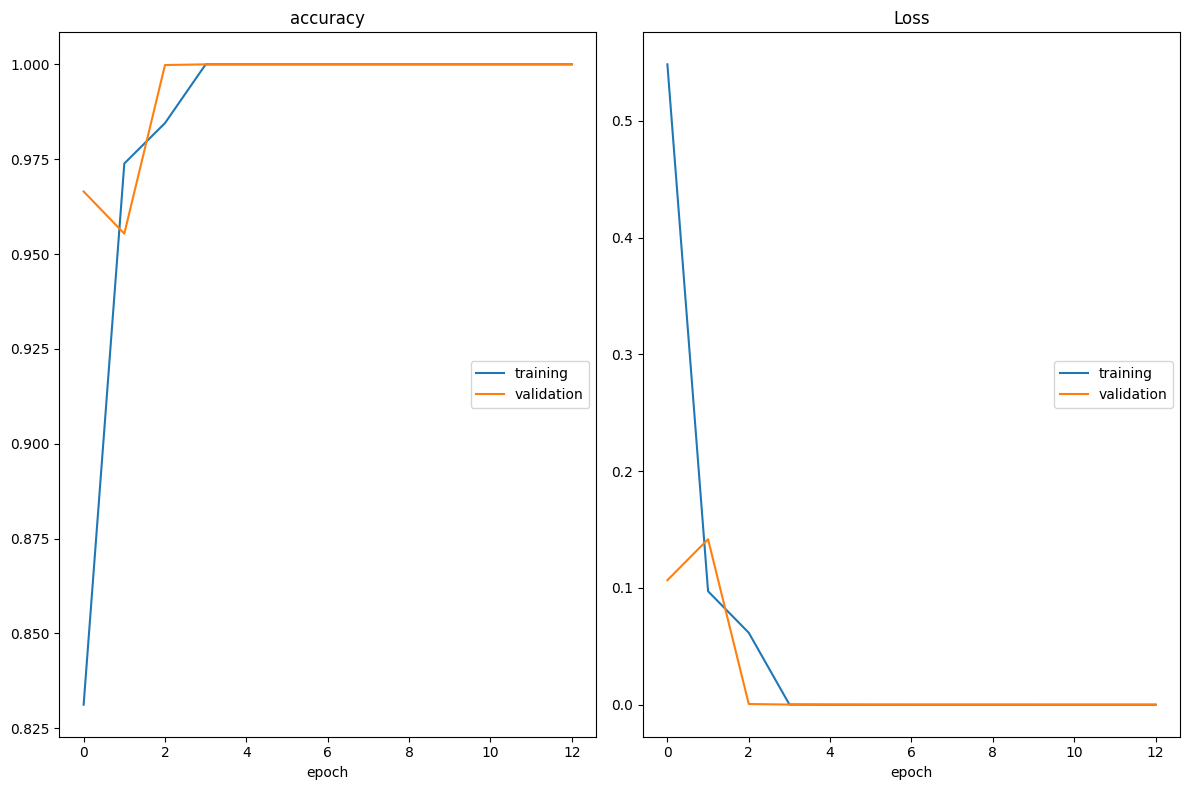

accuracy
	training         	 (min:    0.831, max:    1.000, cur:    1.000)
	validation       	 (min:    0.955, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.548, cur:    0.000)
	validation       	 (min:    0.000, max:    0.142, cur:    0.000)
687/687 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 1.0000 - loss: 8.2245e-07 - val_accuracy: 1.0000 - val_loss: 3.9307e-06
Epoch 13: early stopping


In [20]:
model.fit(X_train, y_train, batch_size=32,
          epochs=50, 
          validation_split = 0.2,
          callbacks=[PlotLossesKeras(),callbacks])

In [21]:
# Evaluate the final model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {accuracy:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9351 - loss: 0.6491
Final Test Accuracy: 0.9357


Pretty decent for a first attempt, but lets try to improve upon it.

In [58]:
dropout_rate = 0.2


model_2 = Sequential()


model_2.add(Conv2D(filters=32, kernel_size=3, padding='same', input_shape=input_shape))
model_2.add(Conv2D(filters=32, kernel_size=3, padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model_2.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(rate=dropout_rate))

model_2.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model_2.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model_2.add(Dropout(rate=dropout_rate*1.5))
model_2.add(Flatten())

model_2.add(Dense(units=64, activation='relu'))
model_2.add(Dropout(rate=dropout_rate*2))
model_2.add(Dense(units=64, activation='relu'))
model_2.add(Dropout(rate=dropout_rate))
model_2.add(Dense(units=25, activation='softmax'))


callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=3,
        verbose=1,
        mode='auto'
    ),
    PlotLossesKeras()
]

optimizer = Adam()

model_2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Users/koa/Documents/ML Course/miniprojects/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


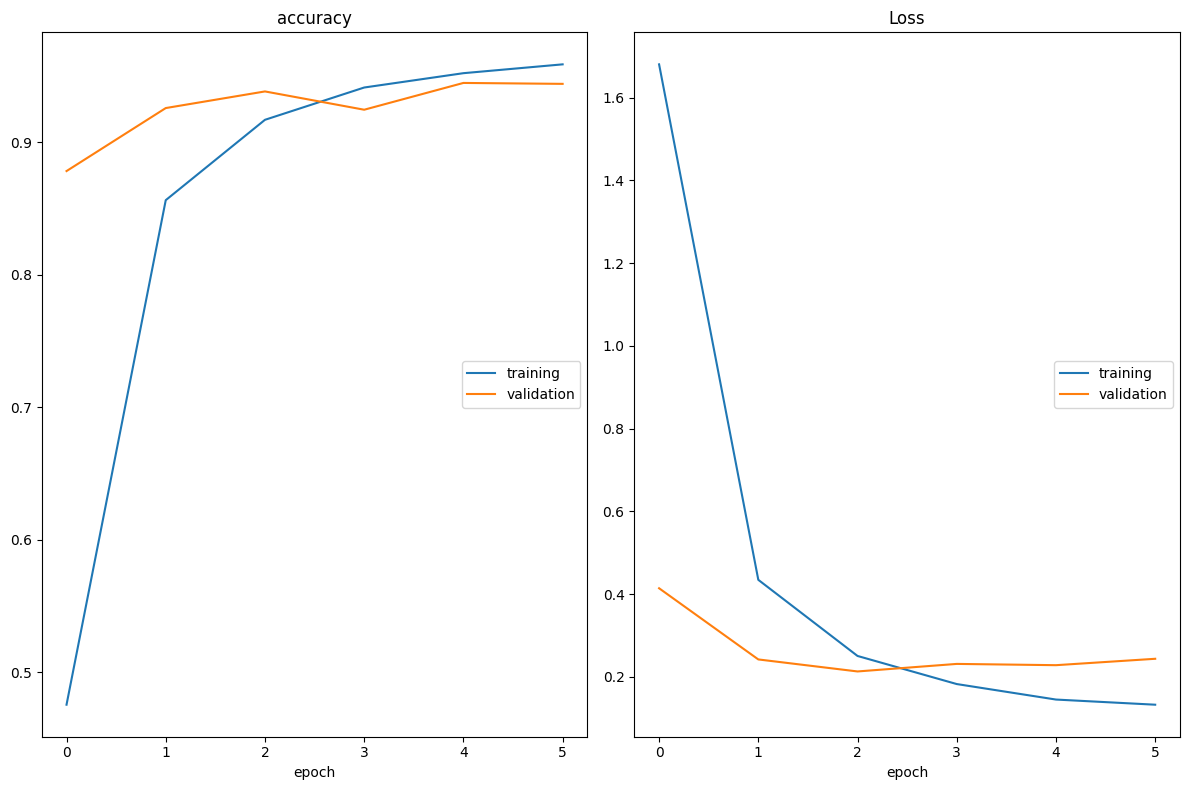

accuracy
	training         	 (min:    0.476, max:    0.959, cur:    0.959)
	validation       	 (min:    0.878, max:    0.945, cur:    0.944)
Loss
	training         	 (min:    0.133, max:    1.681, cur:    0.133)
	validation       	 (min:    0.213, max:    0.414, cur:    0.244)
215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 120ms/step - accuracy: 0.9598 - loss: 0.1336 - val_accuracy: 0.9442 - val_loss: 0.2438
Epoch 6: early stopping
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9410 - loss: 0.2694
Final Test Accuracy: 0.9442


In [59]:
model_2.fit(X_train, y_train, batch_size=128,
          epochs=50, 
          validation_data =(X_test,y_test),
          callbacks=[PlotLossesKeras(),callbacks])

# Evaluate the final model
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {accuracy:.4f}")

There thats a little bit better!

In [4]:
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.color import rgb2gray



In [65]:
def im_test(path: str, num_images: int, model):
    """
    Model takes in file path and the number of images to be used for predictions. File names must follow format of {index_number}.png. 
    A keras model accepting greyscale images of size 28x28x1 must also be passed.
    """
    import string
    alpha_dict = dict(enumerate(string.ascii_lowercase))
    predictions = []

    for image in range(num_images):
        full_path = path + f"{image}.png"
        img = imread(full_path)[:,:,:3]
        img = rgb2gray(img)
        img = resize(img, (28, 28))
        img = img.reshape((1,28,28,1))
        pred = alpha_dict[np.argmax(model.predict(img)[0])]
        predictions.append(pred)
    print(f'The predictions are: {predictions}')


In [72]:
print("Model 1: ")
im_test('./sign_language/test_pics/', 5, model)

print("\nModel 2:")
im_test('./sign_language/test_pics/', 5, model_2)

print("\nThe actual images are of the letters [f, l, x, v, b]")



Model 1: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
The predictions are: ['f', 'l', 'x', 'v', 't']

Model 2:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
The predictions are: ['t', 'l', 'x', 'v', 'o']

The actual images are of the letters [f, l, x, v, b]


The above predictions show our models still struggle a bit with the pretty clean images used. The training dataset seems to not have purely white background which could be the cause of these issues. Perhaps some data augmentation or additional training data could help.

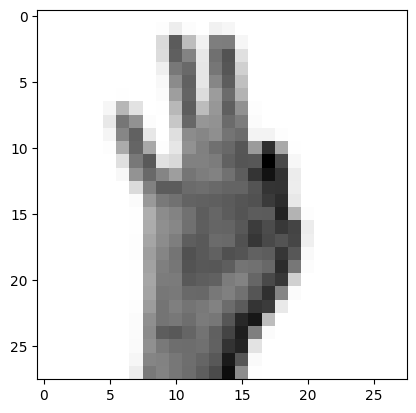

In [71]:
# This is what the scaled and grayscale converted images which gets fed into the models for these final predicitons look like.

img = imread("./sign_language/test_pics/0.png")[:,:,:3]
img = rgb2gray(img)
img = resize(img, (28, 28))

plt.imshow(img, cmap='gray')